## Transmon qubit

### Effective model

A charge qubit is a superconductiong circuit made of a capacitor and a Josephson junction (See Fig. a) below). The transmon is a variant of the charge qubit where the Josephson energy is much larger than the capacitive energy. This change makes the transmon less sensitive to charge and voltage fluctuations.

Following the image above, the Hamiltonian for the transmon qubit is
$$\hat{H}=\frac{1}{2C_\Sigma} (\hat{q}-q_g)^2-E_J \cos(\hat{\varphi})$$
where $q_g=-C_g V$ is the equilibrium charge, $C_g$ is the control capacitance, $V$ the electric potential of the battery, $E_J$ the Josephson junction energy, and $C_\Sigma$ the combined qubit and charging capacitance. $\hat{q}$ is the charge operator of the Cooper pairs, and $\hat{\varphi}$ the flux operator.

We work with this Hamiltonian by introducing the charge number states
$$\hat{q} \lvert n \rangle = -2e n \lvert n \rangle, \quad \text{and} \quad \langle \varphi \lvert n \rangle \sim \frac{1}{\sqrt{2\pi}} e^{-in\varphi}$$

Using the number basis we can represent $\cos(\hat{\varphi})$ as
$$\cos(\hat{\varphi})=\frac{1}{2}\sum_{n\in\mathbb{Z}} \lvert n+1\rangle \langle n\rvert + \vert n \rangle \langle n+1 \rvert$$

Then we can express the charge qubit Hamiltonian in the number representation as
$$ H=\sum_{n\in\mathbb{Z}} \left[ 4 E_C (n-n_g)^2 \lvert n\rangle \langle n\rvert - \frac{E_J}{2}(\lvert n+1\rangle \langle n\rvert + \vert n \rangle \langle n+1 \rvert)\right]$$
with the charging energy $E_C=e^2/2C_\Sigma$.

This operator is an infinite-dimensional matrix
$$H = \left(\begin{matrix}
\ldots & -E_J/2 & 4E_c(-1-n_g)^2 & -E_J/2 & 0 & \ldots\\
\ldots & 0 & -E_J/2 & 4E_c(0-n_g)^2 & -E_J/2 & \ldots\\
\ldots & 0 & 0 & -E_J/2 & 4E_c(+1-n_g)^2 & \ldots
\end{matrix}\right)$$
but it can be truncated to a work in a limit $-n_{max}\leq n \leq n_{max},$ considering enough charge states as to provide a good approximation. In this case, we can write the model as
$$H = 4 E_C (\bar{N}-n_g)^2 - \frac{1}{2}E_J (\bar{S}^+ + \bar{S}^-),$$
with finite dimensional matrices $\bar{N}$ for the number of charges, and charge raising and lowering operators $\bar{S}^\pm.$

We can also introduce a model in which we have $M$ transmons interacting with each other capacitively. If we neglect the renormalization of the transmon capacitance, the effective model reads
$$H = \sum_i \left[4 E_{C,i} (\bar{N}_i-n_{g,i})^2 + \frac{1}{2}E_{J,i}(\bar{S}^+_i + \bar{S}^-_i)\right] + \sum_{i\neq j} g_{ij} \bar{N}_i\bar{N}_j.$$

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

Number operator:
$$\hat{N} = \sum_n n \ket{n}\bra{n}$$

Up ladder operator:
$$\hat{S}^+ = \sum_n \ket{n+1}\bra{n}$$

Hamiltonian
$$ H=\sum_{n\in\mathbb{Z}} \left[ 4 E_C (n-n_g)^2 \lvert n\rangle \langle n\rvert - \frac{E_J}{2}(\lvert n+1\rangle \langle n\rvert + \vert n \rangle \langle n+1 \rvert)\right]$$

$$H = 4E_C (\hat{N} - n_g * I)^2 - \frac{E_J}{2} (\hat{U}+\hat{D})$$

In [2]:
import scipy.sparse as sp

def Hamiltonian(Ec, Ej, ng, nmax=10):
    n = np.arange(-nmax, nmax+1)
    N = sp.diags([n], [0], (2*nmax+1, 2*nmax+1))
    I = sp.eye(2*nmax+1)
    e = np.ones(2*nmax+1)
    Sup = sp.diags([e], [1], (2*nmax+1, 2*nmax+1))
    Sdown = Sup.T
    H = 4 * Ec * (N - ng * I) @ (N - ng * I) - (Ej/2) * (Sup + Sdown)
    if False:
        print("n=", n)
        print("N=", N)
        print("Sup=", Sup.todense())
        print("H=", H.todense())
    return n, H, N

Hamiltonian(1.0, 1.0, 0.0, nmax=3);

In [3]:
n, H, _ = Hamiltonian(1.0, 10, 0.5, nmax=10)
E, U = np.linalg.eigh(H.todense())
print(E)
print("E0=", E[0])
print("U0=", U[:,0])
print("E1=", E[1])
print("U1=", U[:,1])

[ -5.7900806    1.85818754   9.23632771  11.54883204  25.51081605
  25.54997175  49.26138311  49.26145491  81.15645496  81.15645499
 121.10422589 121.10422589 169.07442605 169.07442605 225.05581248
 225.05581343 289.04340749 289.04419503 361.03530261 361.34643837
 441.31192426]
E0= -5.790080598637713
U0= [[-1.31738913e-14]
 [-1.17718507e-12]
 [-8.63417752e-11]
 [-5.08936713e-09]
 [-2.34828749e-07]
 [-8.20405783e-06]
 [-2.07803802e-04]
 [-3.59885769e-03]
 [-3.92285367e-02]
 [-2.37971104e-01]
 [-6.64693825e-01]
 [-6.64693825e-01]
 [-2.37971104e-01]
 [-3.92285367e-02]
 [-3.59885769e-03]
 [-2.07803802e-04]
 [-8.20405783e-06]
 [-2.34828749e-07]
 [-5.08936715e-09]
 [-8.63418493e-11]
 [-1.17699270e-12]]
E1= 1.858187541547754
U1= [[ 5.20172572e-14]
 [ 4.56859685e-12]
 [ 3.28102490e-10]
 [ 1.88378188e-08]
 [ 8.40372904e-07]
 [ 2.80734522e-05]
 [ 6.68104023e-04]
 [ 1.05469192e-02]
 [ 9.87720734e-02]
 [ 4.46606041e-01]
 [ 5.39143244e-01]
 [-5.39143244e-01]
 [-4.46606041e-01]
 [-9.87720734e-02]
 [

Show that the eigenvectors are all well contained in the eigenbasis:

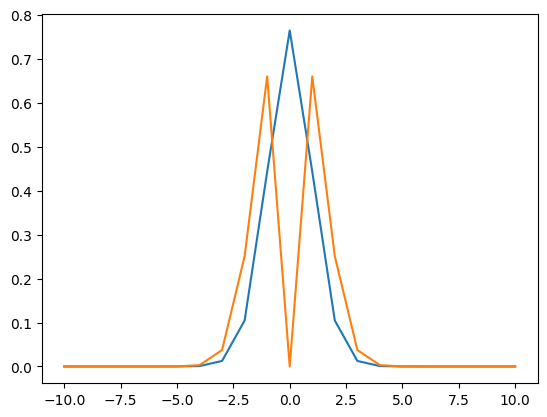

In [4]:
fig, ax = plt.subplots()
n, H, _ = Hamiltonian(1.0, 10, 0.0, nmax=10)
E, U = np.linalg.eigh(H.todense())
U0 = U[:, 0]
U1 = U[:, 1]
ax.plot(n, np.abs(U0), label=r"$\Psi_0$")
ax.plot(n, np.abs(U1), label=r"$\Psi_1$")

Diagonalize the charge qubit, defining a function that accepts all values of $E_J$ and $E_C$:

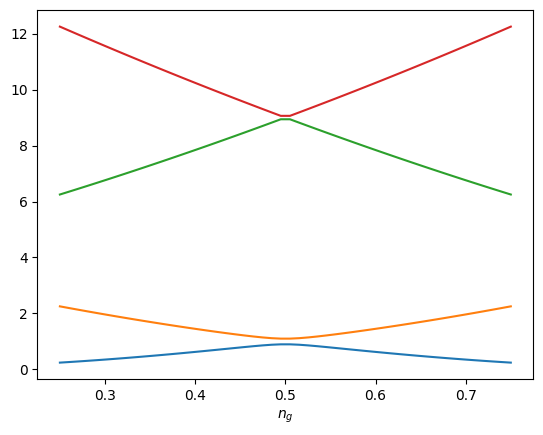

In [7]:
def expt_0(EC: float, EJ: float):
    """Diagonalize the transmon with EJ, EC given, for a range of `ng`."""
    ng = np.linspace(0.25, 0.75)
    E = []
    for ng_i in ng:
        n, H, N = Hamiltonian(EC, EJ, ng_i, nmax=10)
        energies, _ = np.linalg.eigh(H.todense())
        energies = np.sort(energies)
        E.append(energies[:4])

    fig, ax = plt.subplots()
    ax.plot(ng, np.asarray(E))
    ax.set_xlabel(r"$n_g$")

expt_0(EC = 1, EJ = 0.2)

Diagonalize the qubit in the transmon regime and show that it is insensitive to the number of offset charges.

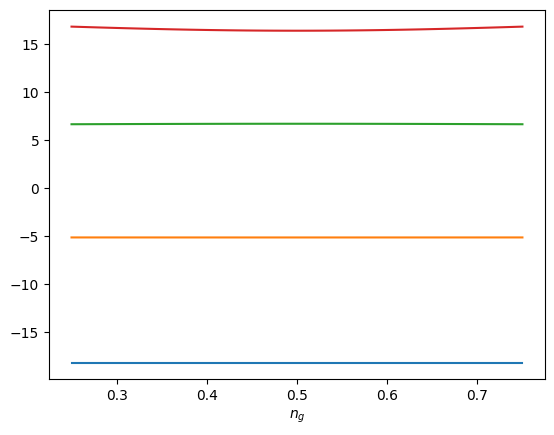

In [8]:
expt_0(EC = 1, EJ = 25)

Compute the projection of the charge operator on the eigenbasis of the qubit:

In [9]:
n, H, N = Hamiltonian(1.0, 10, 0.0, nmax=10)
E, U = np.linalg.eigh(H.todense())
U = np.asarray(U)
U0 = U[:, 0]
U1 = U[:, 1]
[[np.vdot(U0, N @ U0), np.vdot(U0, N @ U1)],
 [np.vdot(U1, N @ U0), np.vdot(U1, N @ U1)]]

[[np.float64(-1.6156513108791915e-14), np.float64(0.6931962212696801)],
 [np.float64(0.6931962212696801), np.float64(-1.8604089165879428e-14)]]

## Exercises:

1. Make a plot of the qubit gap at the degeneracy point $n_g=1/2$ as a function of $E_J/E_C$.
2. Make a plot of the qubit anharmonicity $(E_2-E_1)/(E_1-E_0)$ as a function of $E_J/E_C$.
3. Try to match those plots with the theory predictions from the lecture notes.
4. Plot the strength of the charge operator $\braket{0|\hat{N}|1}$ as a function of $E_J/E_C$. How does the strength of the coupling to external voltages change as we move from the charge to the transmon qubit regimes?